In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [2]:
DATA_PATH = './data/'
with open(DATA_PATH+'importance_scores.pkl','rb') as f:
    scores_labels = pickle.load(f)

In [14]:
DATA_PATH = './data/'
with open(DATA_PATH+'scores_per_graph.pkl','rb') as f:
    scores_per_graph = pickle.load(f)

In [15]:
len(scores_per_graph)

140

In [30]:
scl = scores_per_graph[6] # look at dataframe for first graph

In [31]:
scl.head()

,cell_type,X,Y,cell_id,graph_id,campp_0,campp_1,campp_2,campp_3,campp_4,campp_5,campp_6,campp_7,campp_8,campp_9,campp_median,campp_mad
0,granulocytes,68.0,510.0,683,6,0.417051,0.263164,0.231419,0.103535,0.032558,0.014174,0.045759,0.136217,0.136947,0.160093,0.136582,0.091072
1,granulocytes,81.0,836.0,684,6,0.212576,0.103002,0.069555,0.024273,0.008455,0.007837,0.000000,0.055509,0.060248,0.064863,0.057879,0.041494
2,granulocytes,66.0,976.0,685,6,0.378256,0.235612,0.190833,0.079833,0.000000,0.023001,0.048692,0.097877,0.146883,0.132372,0.115124,0.083648
3,granulocytes,91.0,504.0,686,6,0.418096,0.275769,0.241251,0.108718,0.045874,0.025855,0.059944,0.159323,0.161028,0.158984,0.159153,0.087733
4,granulocytes,98.0,357.0,687,6,0.263922,0.158351,0.146526,0.054149,0.000000,0.000000,0.000000,0.013650,0.068035,0.092540,0.061092,0.068494


In [32]:
# cell type counts for 100 most important cells in first graph
scl.sort_values('campp_median',ascending=False).cell_type[:100].value_counts()

vasculature                20
CD4+ T cells CD45RO+       19
granulocytes               14
tumor cells                13
CD8+ T cells               10
CD68+CD163+ macrophages     5
CD11b+CD68+ macrophages     5
smooth muscle               3
stroma                      3
undefined                   3
dirt                        2
Tregs                       1
CD4+ T cells                1
B cells                     1
Name: cell_type, dtype: int64

In [35]:
# cell type counts in entire graph
scl.cell_type.value_counts()

CD68+CD163+ macrophages       360
stroma                        279
granulocytes                  278
CD11b+CD68+ macrophages       154
tumor cells                   139
CD4+ T cells CD45RO+           94
CD8+ T cells                   38
vasculature                    36
smooth muscle                  27
undefined                      22
Tregs                          21
B cells                        13
dirt                           10
CD68+ macrophages               8
plasma cells                    4
CD4+ T cells                    1
tumor cells / immune cells      1
Name: cell_type, dtype: int64

In [36]:
# actual stage and predicted stage
scl.attrs

{'pred_0': 3.0,
 'pred_1': 3.0,
 'pred_2': 3.0,
 'pred_3': 3.0,
 'pred_4': 3.0,
 'pred_5': 3.0,
 'pred_6': 3.0,
 'pred_7': 3.0,
 'pred_8': 3.0,
 'pred_9': 3.0,
 'stage': 3.0}

In [37]:
coarse_map_inv = {
    'stroma': ['stroma'],
    'tumor': ['tumor cells'],
    'immune': ['granulocytes','CD4+ T cells CD45RO+','CD68+CD163+ macrophages',
              'plasma cells', 'CD8+ T cells', 'Tregs', 'CD4+ T cells',
              'CD11c+ DCs', 'B cells', 'CD11b+CD68+ macrophages',
              'immune cells', 'NK cells','CD68+ macrophages GzmB+', 'CD68+ macrophages',
              'CD11b+ monocytes', 'CD4+ T cells GATA3+', 'CD163+ macrophages','CD3+ T cells'],
    'vasculature':['vasculature']
}

In [38]:
coarse_map = {}
for k,v in coarse_map_inv.items():
    for x in v:
        coarse_map[x] = k

In [39]:
coarse_map

{'stroma': 'stroma',
 'tumor cells': 'tumor',
 'granulocytes': 'immune',
 'CD4+ T cells CD45RO+': 'immune',
 'CD68+CD163+ macrophages': 'immune',
 'plasma cells': 'immune',
 'CD8+ T cells': 'immune',
 'Tregs': 'immune',
 'CD4+ T cells': 'immune',
 'CD11c+ DCs': 'immune',
 'B cells': 'immune',
 'CD11b+CD68+ macrophages': 'immune',
 'immune cells': 'immune',
 'NK cells': 'immune',
 'CD68+ macrophages GzmB+': 'immune',
 'CD68+ macrophages': 'immune',
 'CD11b+ monocytes': 'immune',
 'CD4+ T cells GATA3+': 'immune',
 'CD163+ macrophages': 'immune',
 'CD3+ T cells': 'immune',
 'vasculature': 'vasculature'}

In [40]:
scl.head()

,cell_type,X,Y,cell_id,graph_id,campp_0,campp_1,campp_2,campp_3,campp_4,campp_5,campp_6,campp_7,campp_8,campp_9,campp_median,campp_mad
0,granulocytes,68.0,510.0,683,6,0.417051,0.263164,0.231419,0.103535,0.032558,0.014174,0.045759,0.136217,0.136947,0.160093,0.136582,0.091072
1,granulocytes,81.0,836.0,684,6,0.212576,0.103002,0.069555,0.024273,0.008455,0.007837,0.000000,0.055509,0.060248,0.064863,0.057879,0.041494
2,granulocytes,66.0,976.0,685,6,0.378256,0.235612,0.190833,0.079833,0.000000,0.023001,0.048692,0.097877,0.146883,0.132372,0.115124,0.083648
3,granulocytes,91.0,504.0,686,6,0.418096,0.275769,0.241251,0.108718,0.045874,0.025855,0.059944,0.159323,0.161028,0.158984,0.159153,0.087733
4,granulocytes,98.0,357.0,687,6,0.263922,0.158351,0.146526,0.054149,0.000000,0.000000,0.000000,0.013650,0.068035,0.092540,0.061092,0.068494


In [41]:
scl['coarse_type'] = scl['cell_type'].map(coarse_map).fillna('other')

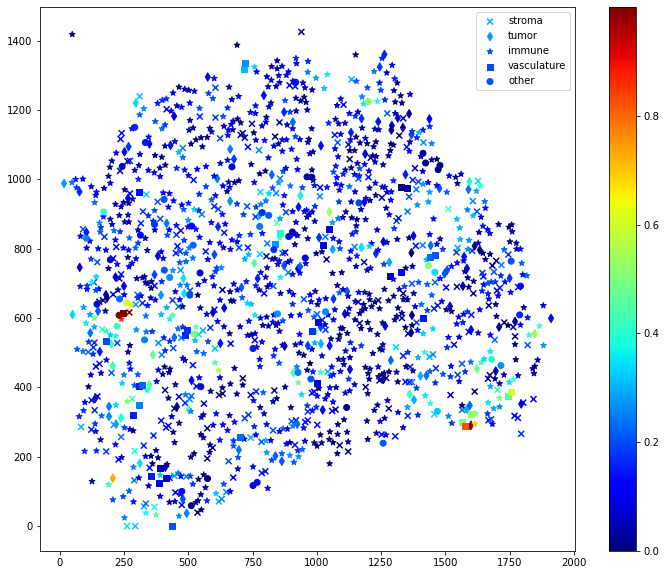

In [42]:
fig, ax = plt.subplots(figsize=(12,10))

mkr_dict = {'stroma': 'x', 'tumor': 'd', 'immune': '*','vasculature':'s', 'other':'o'}
for k,v in mkr_dict.items():
    d = scl[scl.coarse_type==k]
    ax.scatter(d.X, d.Y, 
                c = d.campp_median, 
                marker = v,label=k,
              cmap = 'jet')
ax.legend()
norm = plt.Normalize(np.min(scl.campp_median), np.max(scl.campp_median))
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])
ax.figure.colorbar(sm)
plt.show()

In [43]:
scl.sort_values('campp_median',ascending=False).head()

,cell_type,X,Y,cell_id,graph_id,campp_0,campp_1,campp_2,campp_3,campp_4,campp_5,campp_6,campp_7,campp_8,campp_9,campp_median,campp_mad,coarse_type
279,vasculature,248.0,614.0,22590,6,0.999998,0.999999,0.836133,0.999999,0.999999,0.999997,1.000000,0.999999,0.999998,1.000000,0.999999,0.029496,vasculature
310,vasculature,1576.0,288.0,22621,6,0.854507,0.813257,0.987168,0.823802,0.773522,0.849061,0.728740,0.906301,0.865048,0.747313,0.836432,0.057545,vasculature
398,CD4+ T cells CD45RO+,1591.0,285.0,34310,6,0.685341,0.636778,0.989213,0.658210,0.587618,0.664579,0.492864,0.752774,0.704023,0.508806,0.661395,0.091854,immune
313,vasculature,1756.0,386.0,22624,6,0.608912,0.678487,0.692912,0.619391,0.623404,0.621097,0.561247,0.709162,0.671341,0.646010,0.634707,0.036386,vasculature
25,granulocytes,240.0,597.0,708,6,0.593222,0.597660,0.713638,0.564364,0.550262,0.520862,0.486416,0.593677,0.580401,0.471470,0.572382,0.048523,immune


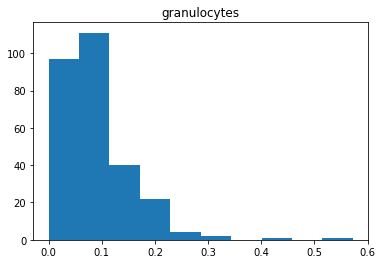

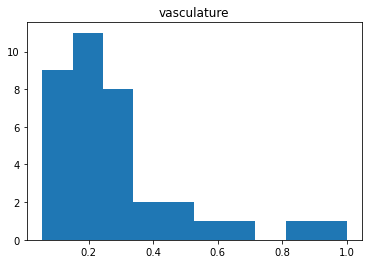

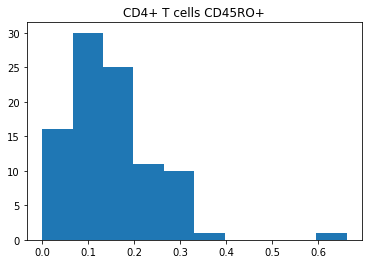

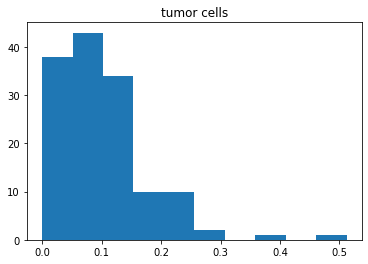

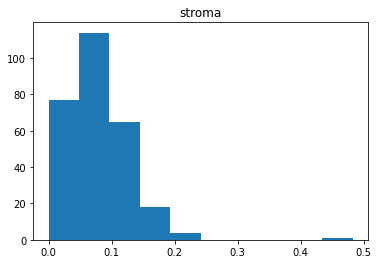

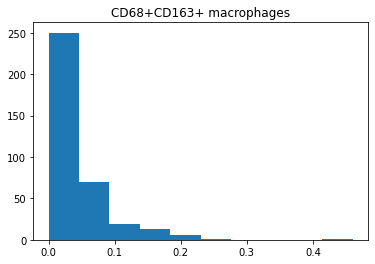

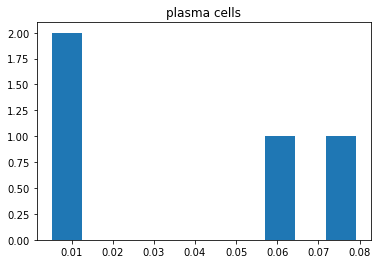

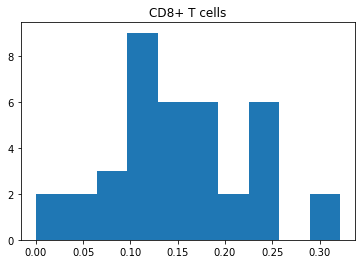

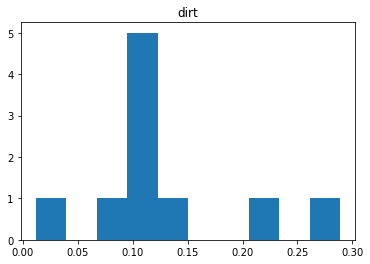

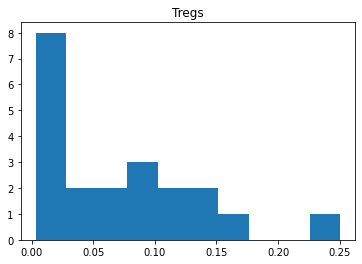

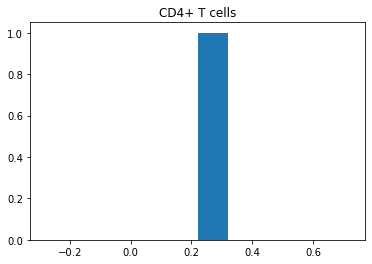

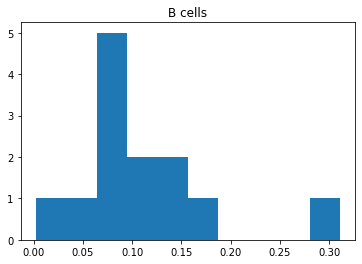

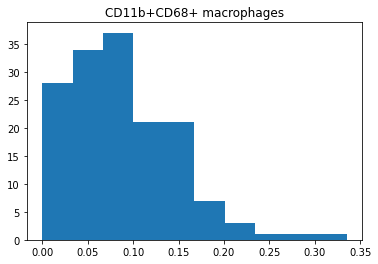

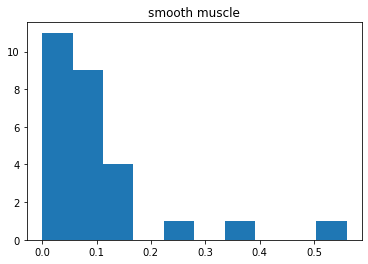

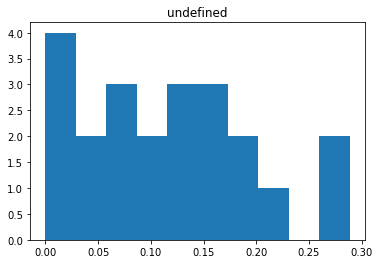

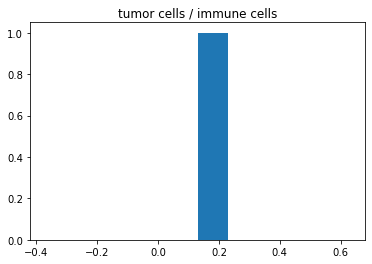

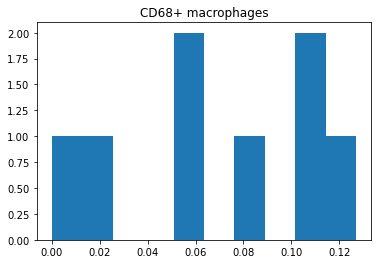

In [44]:
# plot histogram of scores per cell type
for ct in scl.cell_type.unique():
    plt.hist(scl[scl['cell_type'] == ct].campp_median)
    plt.title(ct)
    plt.show()